In [ ]:
# EDA on the population in the dataset 

In [20]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

from itertools import chain
from random import sample 
import scipy

In [21]:
d = pd.read_csv('findings_data.csv')
d.shape

(999, 6)

In [22]:
d.head()

,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size
0,1,1,Cardiomegaly|Emphysema,57,M,NaN
1,2,2,No Finding,77,M,NaN
2,3,3,Atelectasis,79,M,NaN
3,4,4,Cardiomegaly|Edema|Effusion,55,F,NaN
4,5,5,Consolidation|Mass,68,M,2516.0


In [23]:
## split up "Finding Labels" column to one column 

all_labels = np.unique(list(chain(*d['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        d[c_label] = d['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
d.sample(3)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
498,499,499,No Finding,54,M,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
330,331,331,Atelectasis|Effusion|Infiltration|Nodule,57,F,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
665,666,666,Atelectasis,49,M,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# 14 unique types of labels 
len(all_labels)

14

In [25]:
d[all_labels].sum()/len(d)

Atelectasis           0.093093
Cardiomegaly          0.038038
Consolidation         0.043043
Edema                 0.016016
Effusion              0.095095
Emphysema             0.018018
Fibrosis              0.027027
Infiltration          0.134134
Mass                  0.035035
No Finding            0.575576
Nodule                0.041041
Pleural_Thickening    0.032032
Pneumonia             0.006006
Pneumothorax          0.033033
dtype: float64

[Text(0, 0.5, 'Number of Images with Label')]

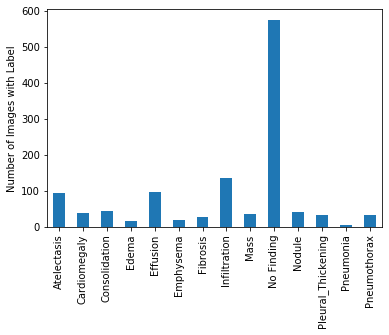

In [27]:
# elative frequencies of each disease
ax = d[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

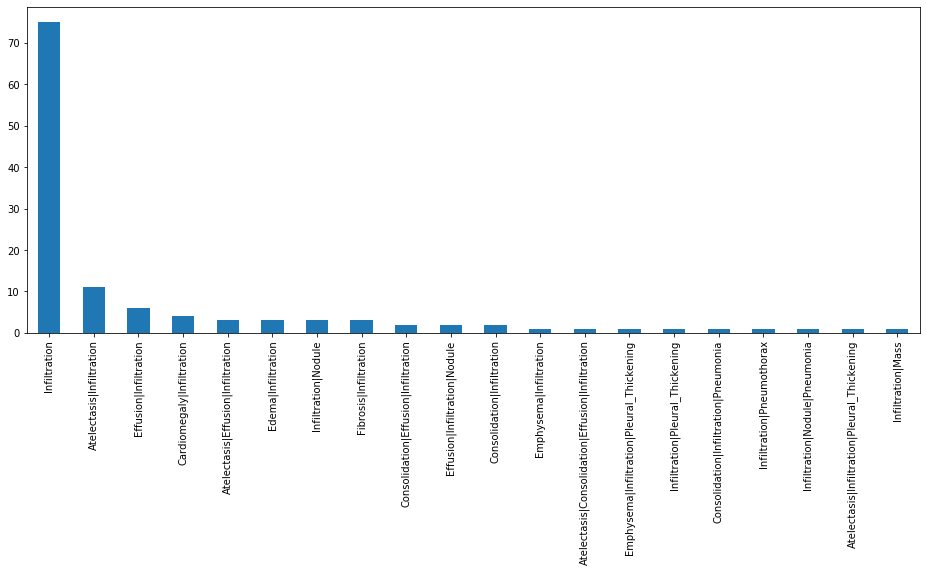

In [29]:
##20 most common co-occurrences:
plt.figure(figsize=(16,6))
d[d.Infiltration==1]['Finding Labels'].value_counts()[0:20].plot(kind='bar')

* Infiltration occurs alone mostly.
* Its most-common comorbidities are Atelectasis and Effusion. 


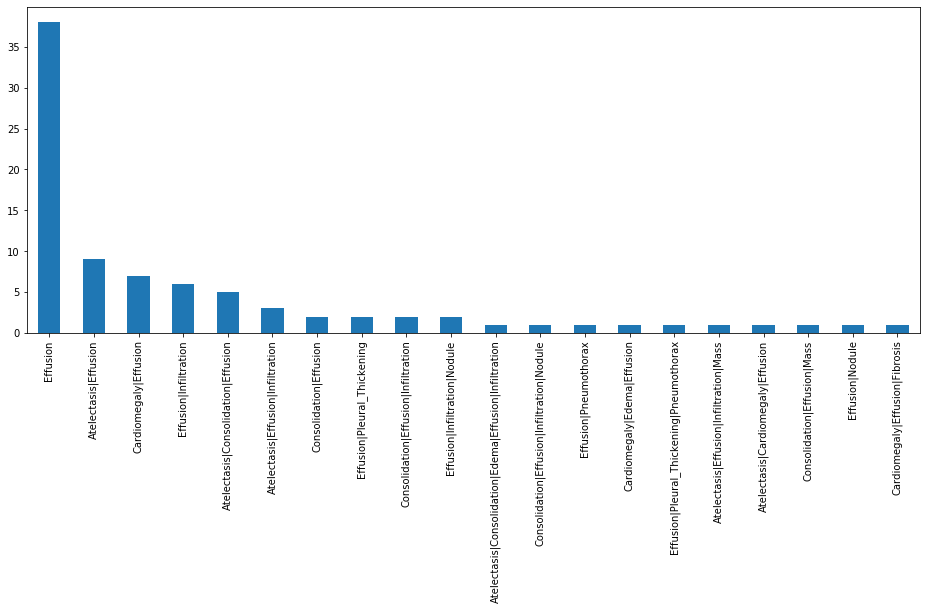

In [30]:
# Effusion
plt.figure(figsize=(16,6))
d[d.Effusion==1]['Finding Labels'].value_counts()[0:20].plot(kind='bar')

* age & gender: 

(array([ 29.,  51.,  60.,  96., 154., 194., 229., 109.,  58.,  19.]),
 array([ 6. , 14.1, 22.2, 30.3, 38.4, 46.5, 54.6, 62.7, 70.8, 78.9, 87. ]),
 <a list of 10 Patch objects>)

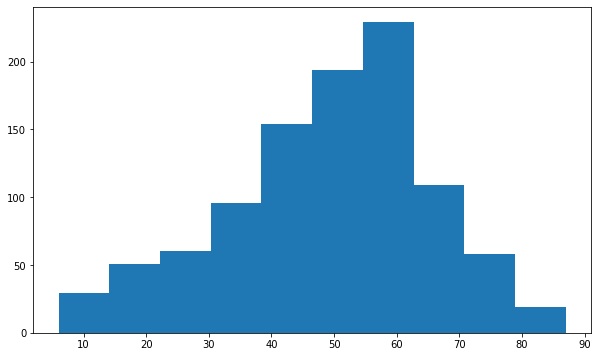

In [9]:
plt.figure(figsize=(10,6))
plt.hist(d['Patient Age'])

(array([ 8., 11., 14., 15., 18., 27., 30.,  4.,  4.,  3.]),
 array([11. , 18.6, 26.2, 33.8, 41.4, 49. , 56.6, 64.2, 71.8, 79.4, 87. ]),
 <a list of 10 Patch objects>)

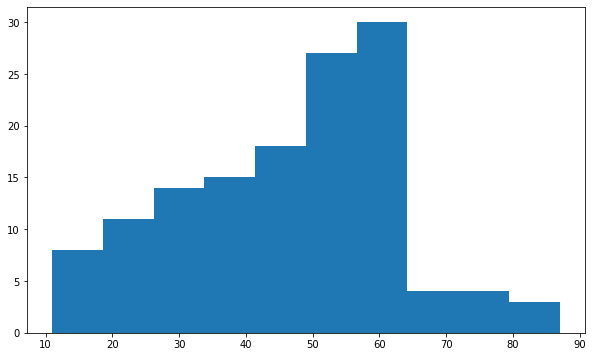

In [10]:
plt.figure(figsize=(10,6))
plt.hist(d[d.Infiltration==1]['Patient Age'])

(array([ 2.,  1.,  6.,  7.,  9., 13., 31., 13.,  7.,  6.]),
 array([11., 18., 25., 32., 39., 46., 53., 60., 67., 74., 81.]),
 <a list of 10 Patch objects>)

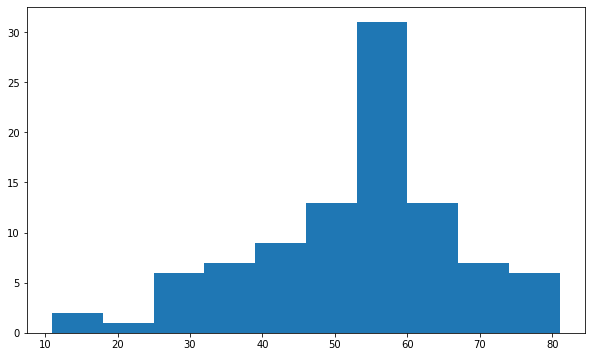

In [11]:
plt.figure(figsize=(10,6))
plt.hist(d[d.Effusion==1]['Patient Age'])

Distribution of age across the whole population is different than it is for Infiltration and Effusion. 
Infiltration appears to be more skewed towards younger individuals.
Effusion spans the age range but has a large peak around 55. 

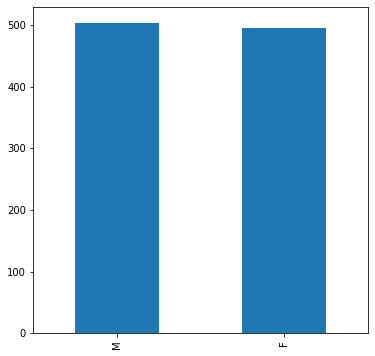

In [12]:
plt.figure(figsize=(6,6))
d['Patient Gender'].value_counts().plot(kind='bar')

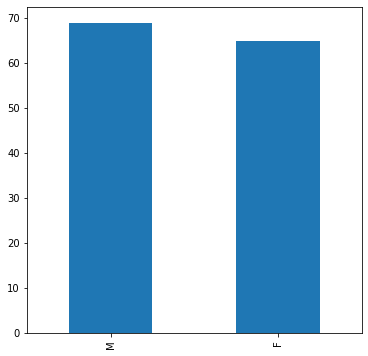

In [13]:
plt.figure(figsize=(6,6))
d[d.Infiltration ==1]['Patient Gender'].value_counts().plot(kind='bar')

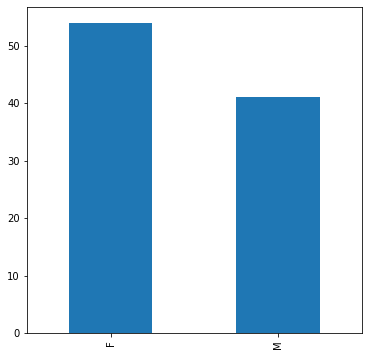

In [14]:
plt.figure(figsize=(6,6))
d[d.Effusion ==1]['Patient Gender'].value_counts().plot(kind='bar')

#### How age & gender relate to mass size

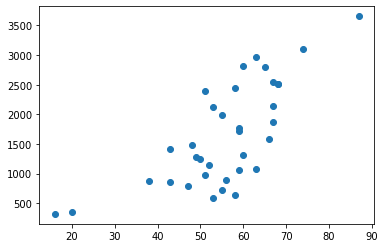

In [15]:
plt.scatter(d['Patient Age'],d['Mass_Size'])

In [16]:
mass_sizes = d['Mass_Size'].values
mass_inds = np.where(~np.isnan(mass_sizes))
ages = d.iloc[mass_inds]['Patient Age']
mass_sizes=mass_sizes[mass_inds]
scipy.stats.pearsonr(mass_sizes,ages)

(0.7275663300043573, 7.354553889321924e-07)

Age and mass size are significantly correlated.
Pearson's coerrelation coefficient: 0.727

In [17]:
np.mean(d[d['Patient Gender']== 'M']['Mass_Size'])

1735.7

In [18]:
np.mean(d[d['Patient Gender']== 'F']['Mass_Size'])

1550.8

In [19]:
scipy.stats.ttest_ind(d[d['Patient Gender']== 'F']['Mass_Size'],d[d['Patient Gender']== 'M']['Mass_Size'],nan_policy='omit')

Ttest_indResult(statistic=-0.6188395721019645, pvalue=0.5402707532656862)

No statistically significant difference between mass size with gender. 